# **Predictive Analythic : Sistem Prediksi Penyakit Stroke Menggunakan Metode K-Nearest Neighbors Classifierr**

**Laporan Proyek Machine Learning - Aditya Yoga Adhiputra**

## **Domain Proyek**

---

Domain proyek yang dijelaskan pada proyek machine learning kali ini yaitu tentang **Kesehatan** dengan judul Predictive Analythics : *Sistem Prediksi Penyakit Stroke Menggunakan Metode K-Nearest Neighbors Classifier*

### **Latar Belakang**

---
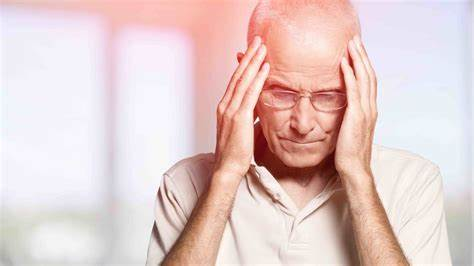


Stroke merupakan salah satu penyakit yang menyebabkan kematian terbanyak di Indonesia. Pada tahun 2013 pravelensi stroke di Indonesia mencapai 12,1 per 1000 penduduk [[1]](https://www.jpnn.com/news/30-persen-penderita-stroke-usia-muda) .Hal ini membuat stroke menjadi penyakit keempat tertinggi yang diderita oleh masyarakat Indonesia. Sedangkan di seluruh dunia, stroke menduduki peringkat kedua sebagai penyakit yang menyebabkan kematian, dengan presentasi 11,13%, dari total kematian yang ada[[2]](https://jtiik.ub.ac.id/index.php/jtiik/article/view/190/0).


Stroke kebanyakan diderita oleh orang yang berusia 40-an tahun. Namun saat ini, tidak menutup kemungkinan diusia muda juga terserang stroke. Data dari Rumah Sakit Saiful Anwar (RSSA) Kota Malang, sepanjang tahun 2016 penderita penyakit stroke 30% nya masih diusia muda, yaitu antara usia 18 – 40 tahun[[3]](https://pusdatin.kemkes.go.id/resources/download/general/Hasil%20Riskesdas%202013.pdf). Oleh karena itu penulis ingin membuat sebuah sistem prediksi yang dapat digunakan oleh masyarakat dalam mencegah terjadinya pentakit stroke.


## **Business Understanding**

### **Problem Statements**


Berdasarkan latar belakang yang menjadi tercipta nya penelitian ini, adapun rincian masalah yang dapat diselesaikan pada proyek ini adalah sebagai berikut :

*   Apa variabel yang paling berpengaruh dalam terhdapa seseorang yang mengalami penyakit stroke?
*   Apa model machine learning yang paling baik untuk memprediksi penyakit stroke?
*   Bagaimana kinerja sistem sederhana untuk memprediksi penyakit Stroke dengan  beberapa algoritma berdasarkan data yang tersedia?


### **Goals**

Adapun tujuan dilakukan nya penelitian ini yaitu:

*   Pengolahan data dari beberapa variabel yang telah ditentukan dalam memprediksi penyakit stroke.
*   Sistem ini dapat digunakan oleh masyarakat untuk memprediksi penyakit stroke berdasarkan gejala-gejala yang ada.
*   Membandingkan beberapa algoritma yang digunakan dalam memprediksi penyakit stroke guna mendapatkan performa yang terbaik.

### **Solution Statements**

Dalam rangka mencapai tujuan penelitian yang ada, penulis akan membangun model prediksi dengan 4 buah model algoritma berbeda. Seluruh model akan dibandingkan dan akan dipilih satu yang terbaik dengan performa serta accuracy terbaik yang digunakan :


*   **Random Forest**

Random Forest adalah kombinasi prediktor pohon sedemikian rupa sehingga setiap pohon bergantung pada nilai vektor acak yang diambil sampelnya secara independen dan dengan distribusi yang sama untuk semua pohon di hutan. Kesalahan generalisasi untuk hutan konvergen sebagai batas karena jumlah pohon di hutan menjadi besar[[4]](https://doi.org/10.1023/A:1010933404324).

*   **Naive Bayes**

Naïve bayes adalah sebuah alat/metode untuk melakukan klasifikasi yang berakar pada teori probabilitas dan statistic yang ditemukan oleh ilmuan asal inggris yaitu thomas bayes. Ciri khas dari naïve bayes adalah metode klasifier ini memiliki asumsi yang kuat terhadap independensi dari masing-masing kondisi / kejadian. Pada metode naïve bayes, setiap kelas keputusan akan menghitung probabilitas dengan syarat bahwa kelas keputusan tersebut benar dan juga metode ini mengasumsikan bahwa atribut objek adalah pelaku independen[[5]](https://scikit-learn.org/stable/modules/naive_bayes.html).

*   **K-Nearest Neighbor**

K-Nearest Neighbor (KNN) adalah suatu metode yang menggunakan algoritma supervised dimana hasil dari query instance yang baru diklasifikan berdasarkan mayoritas dari kategori pada KNN. Tujuan dari algoritma KNN adalah untuk mengklasifikasi objek baru berdasarkan atribut dan training samples. Dimana hasil dari sampel uji yang baru diklasifikasikan berdasarkan mayoritas dari kategori pada KNN[[6]](http://labdas.si.fti.unand.ac.id/2022/03/20/penjelasan-cara-kerja-algoritma-k-nearest-neighbor-knn/).

*   **Logistic Regression**

Logistic Regression merupakan sebuah algoritma klasifikasi untuk mencari hubungan antara fitur (input) diskrit/kontinu dengan probabilitas hasil output diskrit tertentu[[7]](https://vincentmichael089.medium.com/machine-learning-2-logistic-regression-96b3d4e7b603).


## **Data Loading**

In [1]:
# install imblearn for random sampling
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Data and Visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

#Model Classifiacation
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Metrics Accuracy
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Directory
from google.colab import files

In [3]:
!pip install -q kaggle

In [4]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"adityayogaadhiputra","key":"2b4d823ee1ca87275658f0045cee735a"}'}

In [5]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

rm: cannot remove '/root/.kaggle': No such file or directory


In [6]:
! kaggle datasets download -d fedesoriano/stroke-prediction-dataset

  0% 0.00/67.4k [00:00<?, ?B/s]
100% 67.4k/67.4k [00:00<00:00, 32.1MB/s]


In [7]:
!unzip /content/stroke-prediction-dataset.zip

Archive:  /content/stroke-prediction-dataset.zip
  inflating: healthcare-dataset-stroke-data.csv  


In [8]:
df = pd.read_csv('/content/healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## **Data Understanding**

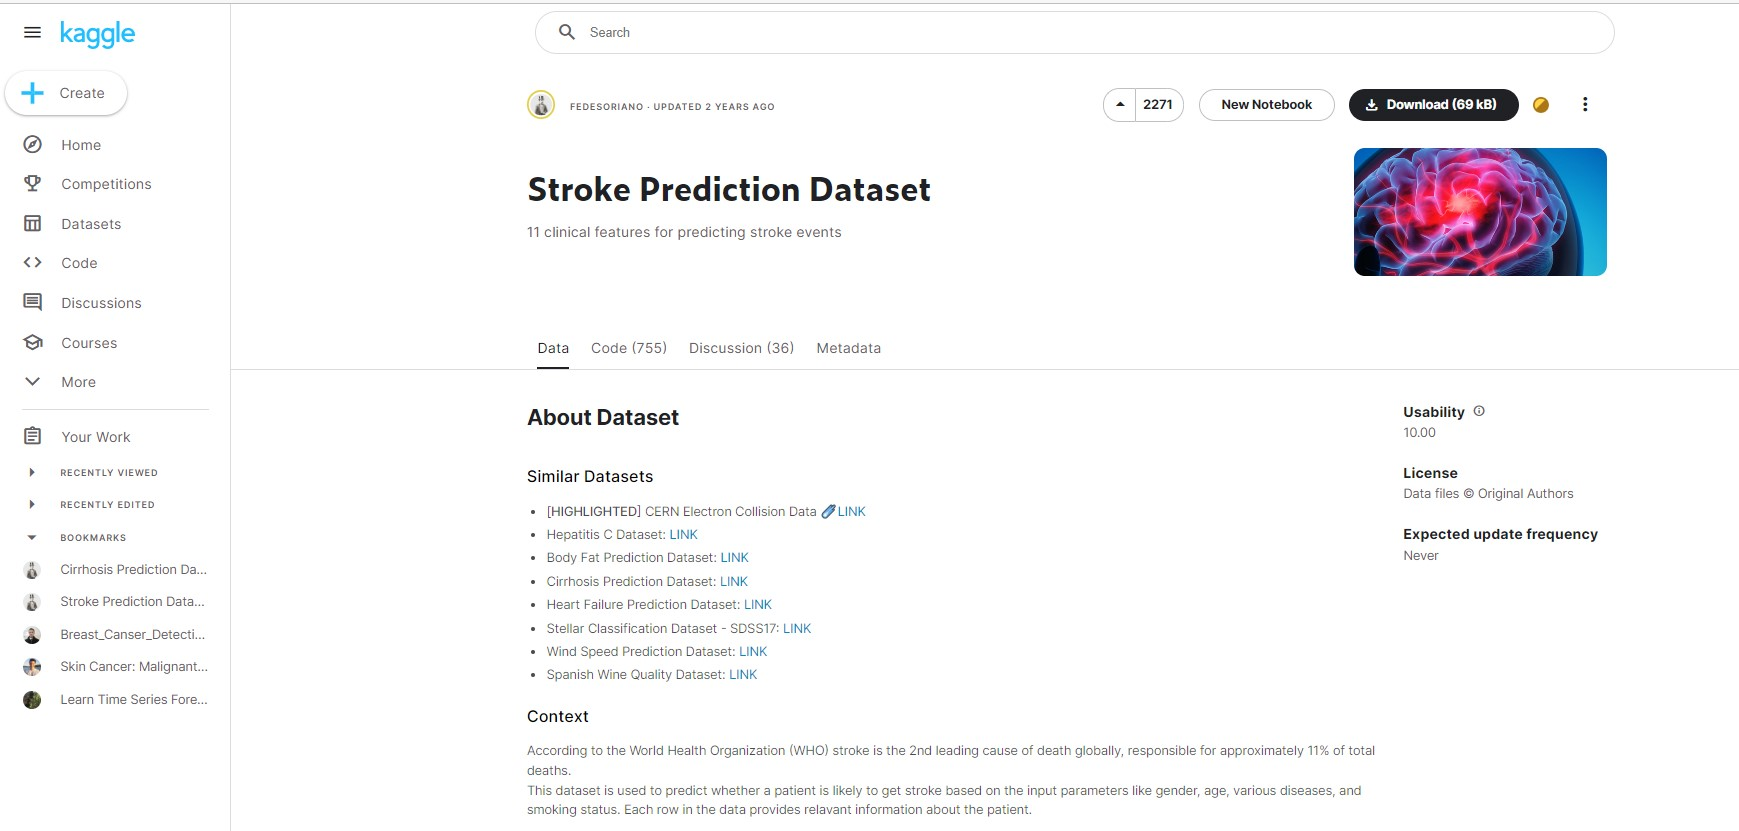



Dataset yang penulis gunakan dalam proyek ini, yaitu Dataset dengan judul Stroke Prediction Dataset yang diambil pada laman Kaggle [[5]](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset). Dataset terebut berisikan 5110 data dengan 12 kolom. Berikut merupakan informasi lebih detail dari masing masing kolom dataset:


*   `id`: unique identifier
*   `gender`: "Male", "Female" or "Other"
*   `age`: age of the patient
*   `hypertension`: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
*   `heart_disease`: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
*   `ever_married`: "No" or "Yes"
*   `work_type`: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
*   `Residence_type`: "Rural" or "Urban"
*   `avg_glucose_level`: average glucose level in blood
*   `bmi`: body mass index
*   `smoking_status`: "formerly smoked", "never smoked", "smokes" or "Unknown"*
*   `stroke`: 1 if the patient had a stroke or 0 if not

### **Exploratory Data Analysis**

Pada tahap ini penulis ingin melakukan visualisasi data pada dataset yang berguna untuk menganalisis data 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [11]:
categorical= ['gender','ever_married','work_type','Residence_type','smoking_status']
numerical = ['age','hypertension','avg_glucose_level','bmi','stroke']

**Ploting Box-plot**

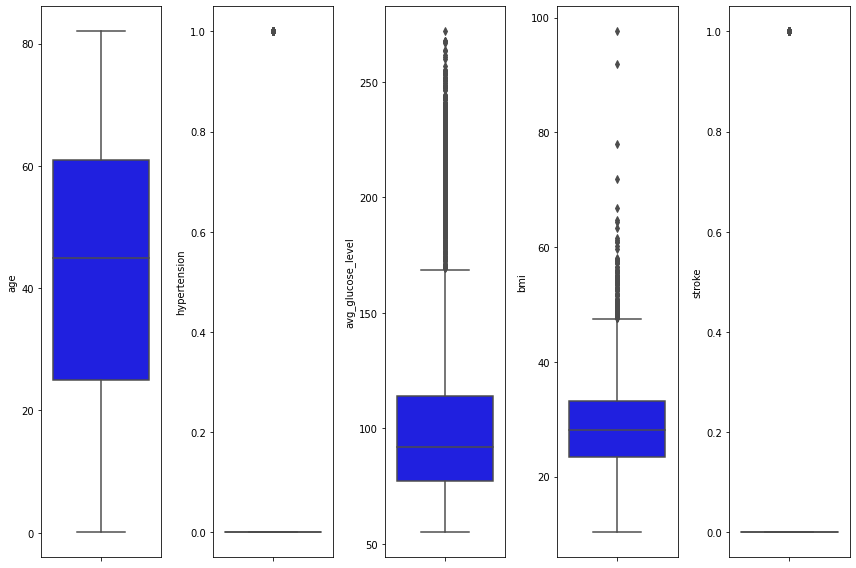

In [12]:
plt.figure(figsize=(12,8))
for i in range(0, len(numerical)):
  plt.subplot(1, 5, i+1)
  sns.boxplot(y=df[numerical[i]], color='blue', orient='vertical')
  plt.tight_layout()

### **Univariate Analysis**

**Categorical Features**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

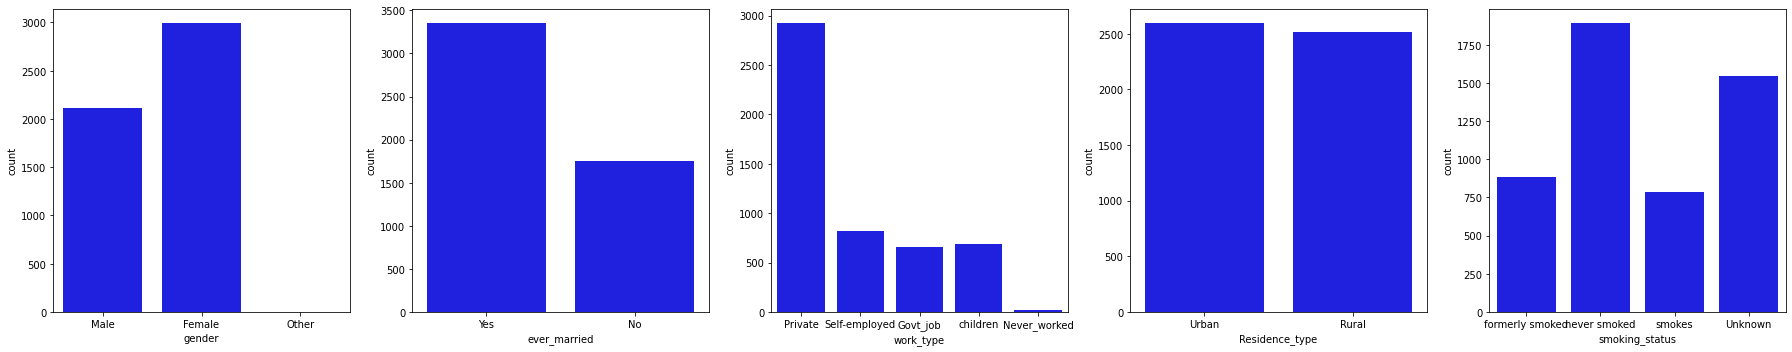

In [13]:
plt.figure(figsize=(25,5))
for i in range (0, len(categorical)):
  plt.subplot(1,5, i+1)
  sns.countplot(df[categorical[i]], color='blue')
  plt.tight_layout()

**Numerical Features**

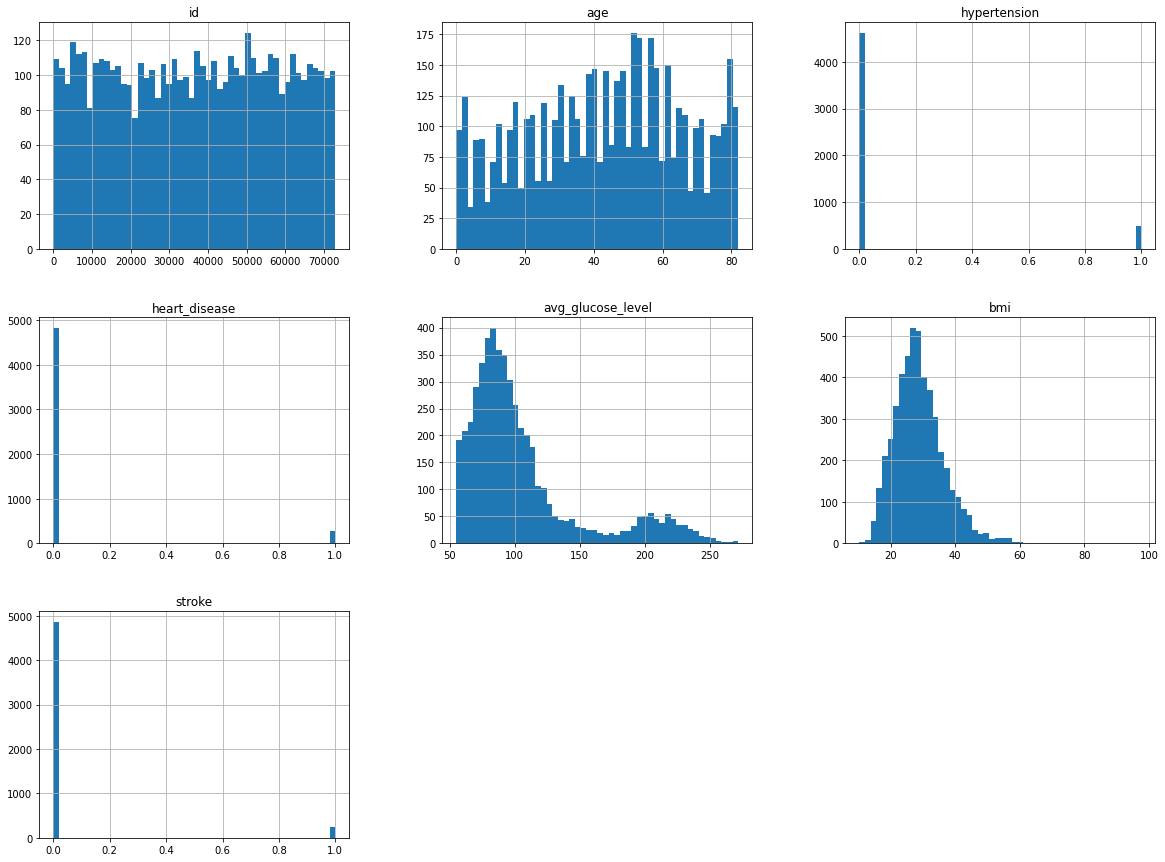

In [14]:
df.hist(bins=50, figsize=(20,15))
plt.show()

### **Multivariate Analysis**

**Categorical Features**

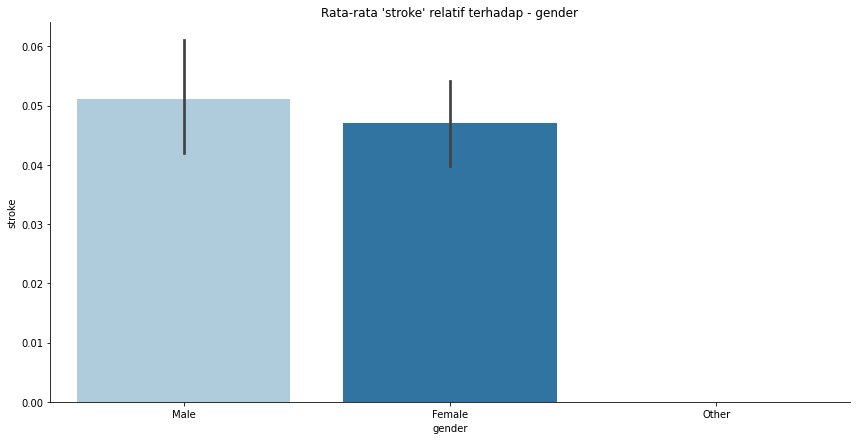

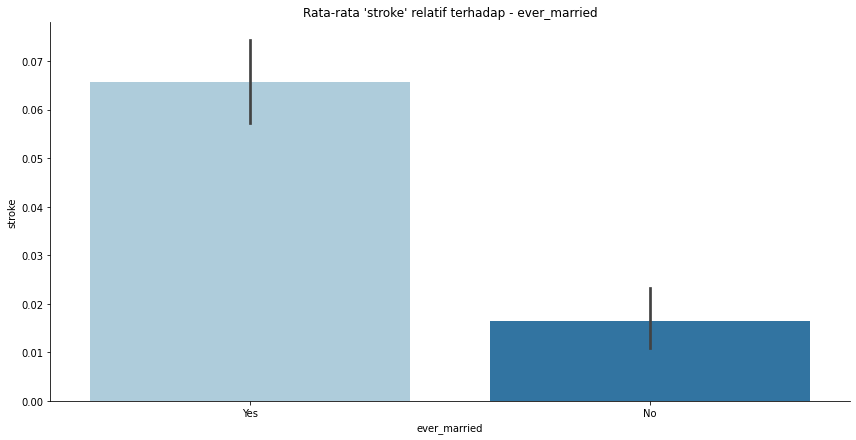

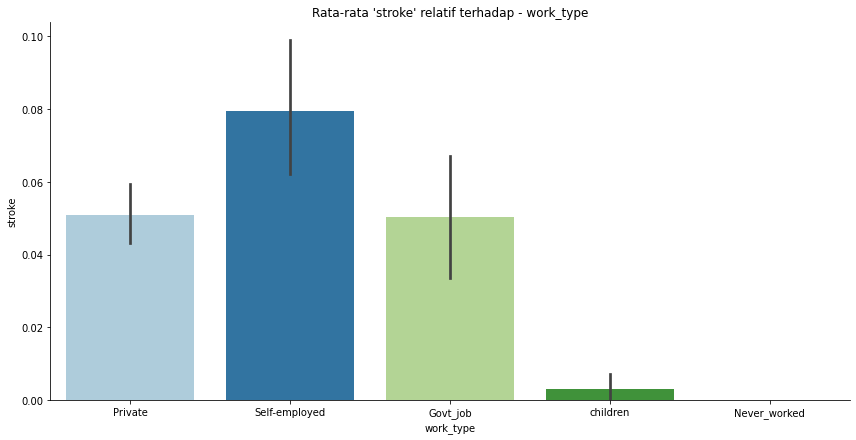

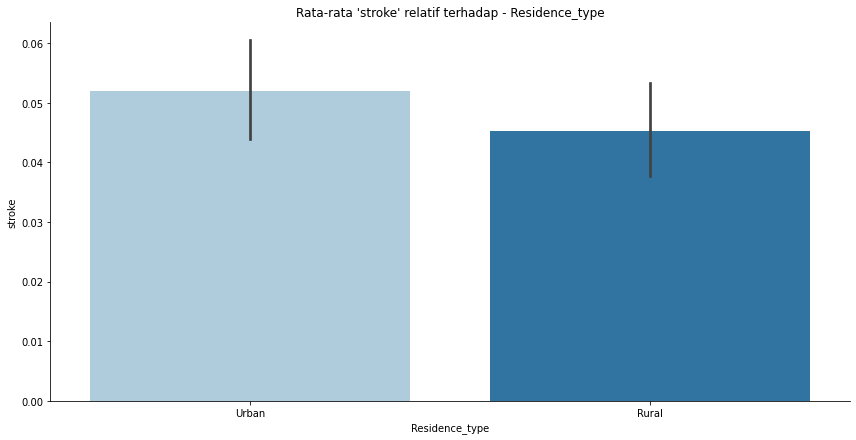

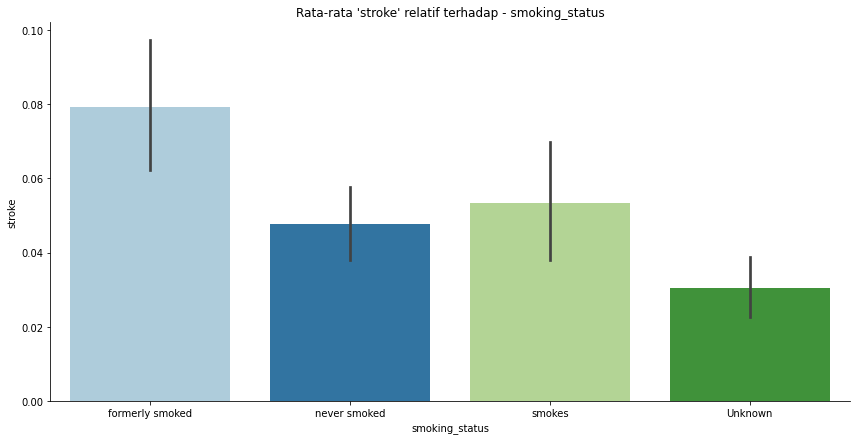

In [15]:
cat_features = df.select_dtypes(include='object').columns.to_list()
 
for col in cat_features:
  sns.catplot(x=col, y="stroke", kind="bar", dodge=False, height = 6, aspect = 2,  data=df, palette="Paired")
  plt.title(f"Rata-rata 'stroke' relatif terhadap - {col}")

**Numerical Features**

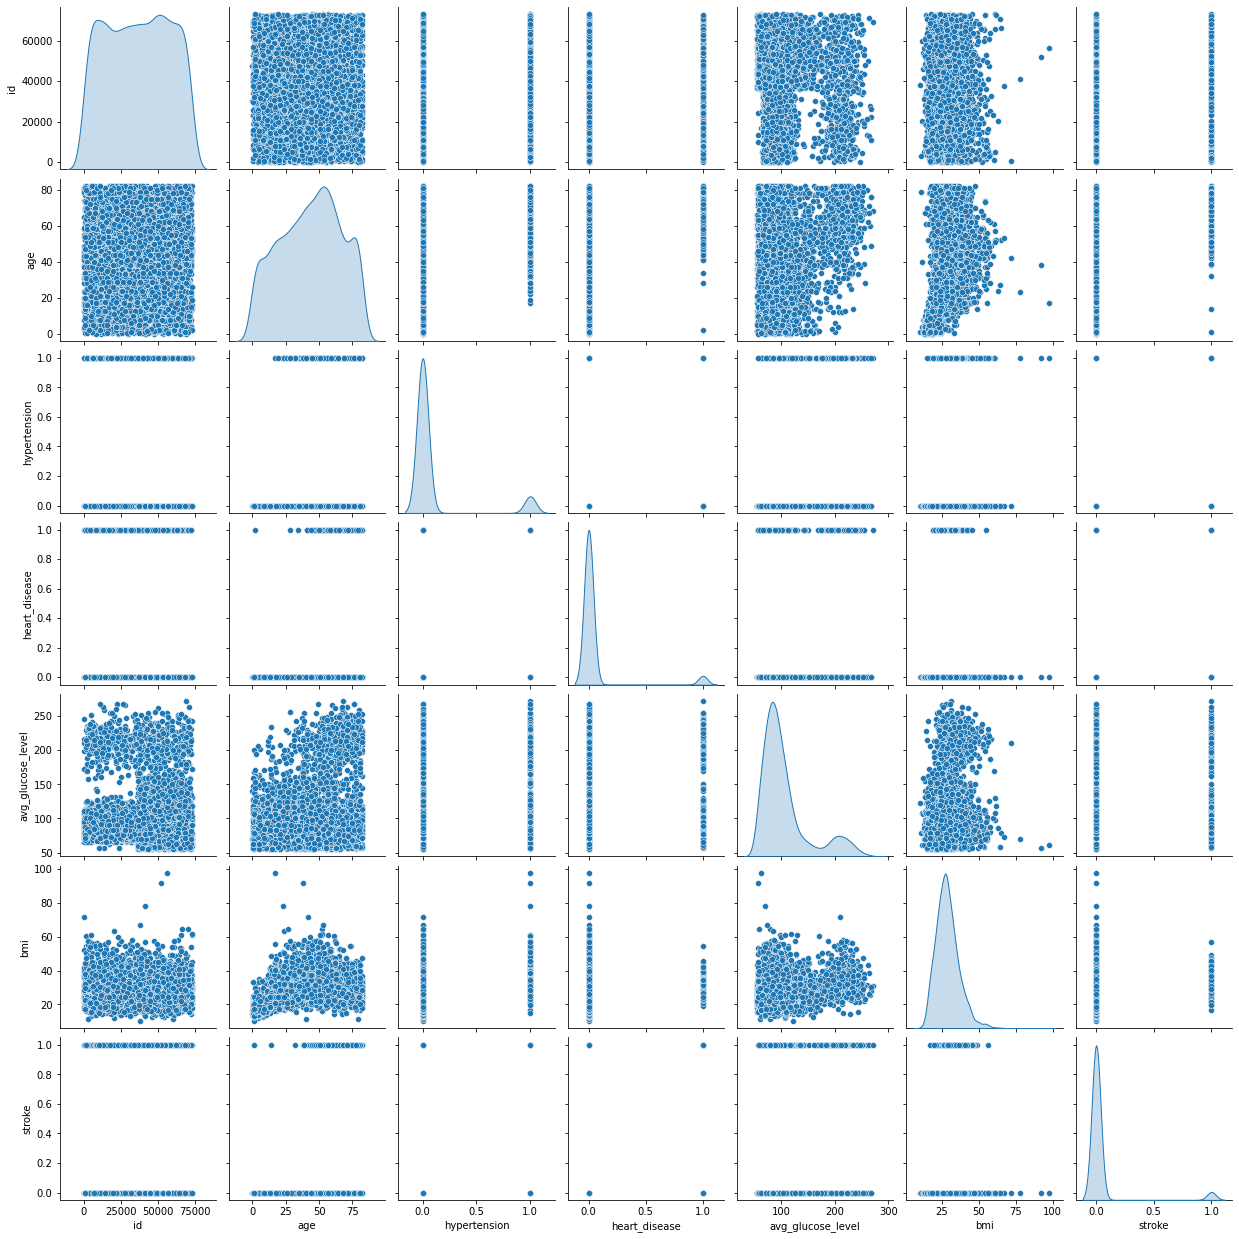

In [16]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(df, diag_kind = 'kde')

**Correlation Matrix**

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

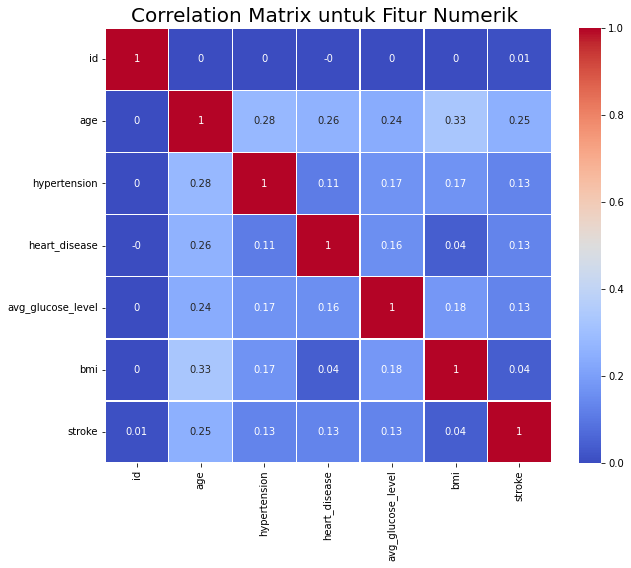

In [17]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)
 
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

### **Data Cleaning**

**Handling Missing Value**

In [18]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [19]:
# mengisi missing value pada kolom 'Age' dengan nilai mean
df['bmi'].fillna(df['bmi'].mean(), inplace = True)

In [20]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [21]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


## **Data Preparation**

Teknik yang penulis gunakan dalam tahap Data Preparation adalah sebagai berikut:  

*  **Encoding Categorical Feature**

Pada tahap ini, penulis melakukan proses encoding terhadap fitur kategori dengan menggunakan teknik One-Hot-Encoding yang merupakan teknik untuk merepresentasikan variabel atau fitur kategorikan ke dalam vektor biner. Guna mewujudkan hal tersebut, penulis menggunakan teknik LabelEncoder pada 
library Scikitlearn[[8]](https://medium.com/analytics-vidhya/one-hot-encoding-categorical-variables-what-is-it-why-is-it-how-is-it-6fd9ed3a161).

*   **Train-Test-Split**

Pada tahap ini, penulis melakukan pembagian dataset menjadi data latih dan data uji menggunakan train_test_split dari library Scikitlearn. Pembagian dataset ini bertujuan agar nantinya dapat digunakan untuk melatih dan mengevaluasi kinerja model. Pada proyek ini, 90% dataset digunakan untuk melatih model, dan 10% sisanya digunakan untuk mengevaluasi kinerja model.

*   **Standardization**

Pada tahap ini, penulis melakukan standardisasi menggunakan StandarScaler yang terdapat pada library sckitlearn. Standardisasi ini sangat berguna dalam menyeratakan skala pada data terutama data numerical

*   **Balancing the Dataset**

Pada tahap ini penulis melakukan over sampling. Dilakukan nya oversampling dikarenakan terjadi ketidakseimbangan pada data. Penulis menggunakan Metode SMOTE. Metode Synthetic Minority Over-samplingTechnique (SMOTE) merupakan metode yang populer diterapkan dalam rangka menangani ketidak seimbangan kelas. Teknik ini mensintesis sampel baru dari kelas minoritas untuk menyeimbangkan dataset dengan cara membuat instance baru dari minority class dengan pembentukan convex kombanasi dari instances yang saling berdekatan[[9]](https://mti.binus.ac.id/2018/06/08/synthetic-minority-over-sampling-technique-smote-algorithm-for-handling-imbalanced-data/).

**Label Encoder**

from sklearn.preprocessing import LabelEncoder
cat_columns = ['gender','ever_married','work_type','Residence_type','smoking_status	']      
label_encoder = LabelEncoder()

for col in cat_columns:
    label_encoder.fit(df[col])
    df[col] = label_encoder.transform(df[col])

In [22]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df = df.apply(label_encoder.fit_transform)

In [23]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,671,1,88,0,1,1,2,1,3850,240,1,1
1,3610,0,82,0,0,1,3,0,3588,162,2,1
2,2151,1,101,0,1,1,2,0,2483,199,2,1
3,4226,0,70,0,0,1,2,1,3385,218,3,1
4,114,0,100,1,0,1,3,0,3394,113,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,1312,0,101,1,0,1,2,1,1360,162,2,0
5106,3100,0,102,0,0,1,3,1,3030,274,2,0
5107,1396,0,56,0,0,1,3,0,1314,180,2,0
5108,2601,1,72,0,0,1,2,0,3363,129,1,0


**Balancing the Dataset**

In [24]:
x = df.iloc[:,1:10]
y = df.iloc[:,11]
x

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi
0,1,88,0,1,1,2,1,3850,240
1,0,82,0,0,1,3,0,3588,162
2,1,101,0,1,1,2,0,2483,199
3,0,70,0,0,1,2,1,3385,218
4,0,100,1,0,1,3,0,3394,113
...,...,...,...,...,...,...,...,...,...
5105,0,101,1,0,1,2,1,1360,162
5106,0,102,0,0,1,3,1,3030,274
5107,0,56,0,0,1,3,0,1314,180
5108,1,72,0,0,1,2,0,3363,129


In [25]:
y.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [26]:
from pandas.core.common import random_state
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_smote, y_smote = smote.fit_resample(x,y)

In [27]:
from collections import Counter
print("Before SMOTE : ", Counter(y))
print("After SMOTE : ", Counter(y_smote))

print('\n Balance of positive and negative class (in percentage %)' )
y_smote.value_counts(normalize=True) * 100

Before SMOTE :  Counter({0: 4861, 1: 249})
After SMOTE :  Counter({1: 4861, 0: 4861})

 Balance of positive and negative class (in percentage %)


1    50.0
0    50.0
Name: stroke, dtype: float64

**Train-Test-Split**

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)
print(x_test)

      gender  age  hypertension  heart_disease  ever_married  work_type  \
1145       0   28             0              0             0          4   
8501       1  101             0              0             1          2   
3903       1   87             0              0             1          2   
1608       1   80             0              0             1          2   
9139       1   93             0              0             1          2   
...      ...  ...           ...            ...           ...        ...   
6255       1   91             0              0             1          3   
1918       0   89             0              0             0          0   
9530       0   97             0              0             1          2   
4184       0   56             0              0             1          2   
5953       0   89             0              0             1          2   

      Residence_type  avg_glucose_level  bmi  
1145               1               1641   47  
8501 

In [29]:
print(f'Total # of sample in whole dataset: {len(x)}')
print(f'Total # of sample in train dataset: {len(x_train)}')
print(f'Total # of sample in test dataset: {len(x_test)}')

Total # of sample in whole dataset: 5110
Total # of sample in train dataset: 7777
Total # of sample in test dataset: 1945


**Standardization**

In [30]:
num_features = ['age','avg_glucose_level','bmi']
scaler = StandardScaler()
scaler.fit(x_train[num_features])
x_train[num_features] = scaler.transform(x_train.loc[:, num_features])
x_train[num_features].head()

,age,avg_glucose_level,bmi
5377,0.881279,1.418061,0.090505
6692,0.972626,-1.151918,0.074938
4996,-0.671617,-0.149651,-0.905775
1561,0.333198,0.749883,0.853281
2114,-1.174024,-0.748506,-0.999176


## **Modeling**
---
Pada tahap ini, penulis membangun model prediksi dengan menggunakan 4 algoritma berbeda, yaitu Random Forest, Naive Bayes, K-Nearest Neighbor, Logistic Regression. Penelitian ini berupa klasifikasi maka penulis menggunakan metriks accuracy untuk melihat performa dari model dari ke-4 algoritma yang digunakan.

Dari keempat algoritma tersebut kemudian penulis akan menjelaskan masing-masing performa model yang telah dilatih dan menjalankan pengujian sebagai berikut:

Pada tahapan pertama yaitu pelatihan model, berikut merupakan akurasi masing-masing model sebagai berikut:

1.   Model yang menggunakan algoritma *Random Forest Classifier* berhasil mendapatkan akurasi skor model sebesar : 0.9998 atau sekitar 99%
2.   Model yang menggunakan algoritma *Gaussian Naive Bayes* mendapatkan akurasi skor model sebesar: 0.7959 atau sekitar 80%
3.   Model yang menggunakan algoritma *K-Neighbors Classifier* mendapatkan akurasi skor model sebesar: 0.9146 atau sekitar 91%
4.   Model yang menggunakan algoritma *Logistic Regression* mendapatkan akurasi skor model sebesar: 0.8193 atau sekitar 82%


Pada tahapan kedua yaitu pengujian model, berikut merupakan akurasi masing-masing model sebagai berikut:

1.   Model yang menggunakan algoritma *Random Forest Classifier* berhasil mendapatkan akurasi skor model sebesar : 0.5059 atau sekitar 50%
2.   Model yang menggunakan algoritma *Gaussian Naive Bayes* mendapatkan akurasi skor model sebesar: 0.5074 atau sekitar 50%
3.   Model yang menggunakan algoritma *K-Neighbors Classifier* mendapatkan akurasi skor model sebesar: 0.5233 atau sekitar 52%
4.   Model yang menggunakan algoritma *Logistic Regression* mendapatkan akurasi skor model sebesar: 0.4987 atau sekitar 49%

In [31]:
def models(x_train, y_train):

  # Random Forest Classifier
  rfc = RandomForestClassifier()
  rfc.fit(x_train, y_train)

  # Gaussian Naive Bayes
  gauss = GaussianNB()
  gauss.fit(x_train, y_train)

  # KNeighborsClassifier  
  knn = KNeighborsClassifier()
  knn.fit(x_train, y_train)

  # Logistic Regression
  loreg = LogisticRegression()
  loreg.fit(x_train, y_train)

  print('[0] Random Forest Classifier Training Acc : ' , rfc.score(x_train, y_train))
  print('[1] Gaussian Naive Bayes Training Acc : ' , gauss.score(x_train, y_train))
  print('[2] KNeighborsClassifier Training Acc : ' , knn.score(x_train, y_train))
  print('[3] Logistic Regression Training Acc : ' , loreg.score(x_train, y_train))

  return rfc, gauss, knn, loreg

In [32]:
model = models(x_train, y_train)

[0] Random Forest Classifier Training Acc :  1.0
[1] Gaussian Naive Bayes Training Acc :  0.7959367365307959
[2] KNeighborsClassifier Training Acc :  0.9146200334319147
[3] Logistic Regression Training Acc :  0.8193390767648193


In [33]:
for i in range(len(model)):
   cm = confusion_matrix(y_test, model[i].predict(x_test)) 
   #extracting TN, FP, FN, TP
   TN, FP, FN, TP = confusion_matrix(y_test, model[i].predict(x_test)).ravel()
   print(cm)
   print('Model[{}] Testing Accuracy = "{} "'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
   print()

[[960  15]
 [957  13]]
Model[0] Testing Accuracy = "0.5002570694087404 "

[[ 95 880]
 [ 78 892]]
Model[1] Testing Accuracy = "0.5074550128534704 "

[[757 218]
 [709 261]]
Model[2] Testing Accuracy = "0.5233933161953728 "

[[  0 975]
 [  0 970]]
Model[3] Testing Accuracy = "0.4987146529562982 "



Akurasi terbesar pada pelatihan model yaitu algoritma Random Forest Classifier, lalu diikuti dengan algoritma K-NeighborsClassifier. Untuk akurasi pada saat pengujian model hasil tertinggi didapat oleh algoritma K-NeighborsClassifier , lalu diikuti dengan algoritma Naive Bayes.

Berdasarkan hasil pelatihan dan pengujian model tersebut penulis menyimpulkan bahwa performa terbaik dan stabil ketika model menggunakan algoritma K-NeighborsClassifier

## **Evaluation**

---

Karena model yang digunakakan merupakan model klasifikasi sehingga model yang telah dibangun akan di evaluasi dengan metode confusion matrix. Confusion matrix  adalah ringkasan tabular dari jumlah prediksi yang benar dan salah yang dibuat oleh model klasifikasi. Confusion matrix digunakan untuk mengukur kinerja model klasifikasi. 

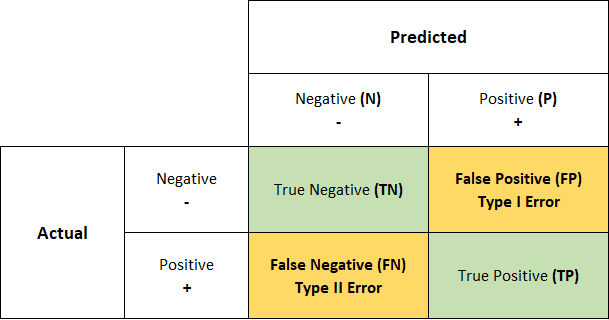


Berikut merupakan penjelasan dari masing-masing nilai yang terdapat pada confusion matrix:

*   **Nilai Prediksi**: keluaran dari program dimana nilainya Positif dan Negatif.
*   **Nilai Aktual**: nilai sebenarnya dimana nilainya True dan False.
*   **True Positive** (TP): Nilai aktual Positif dan diprediksi juga Positif.
*   **True Negative** (TN): Nilai actual Negatif dan prediksi juga Negatif.
*  **False Positive** (FP): Nilai actual negatif tetapi prediksi positif. Istilah lain nya dikenal sebagai 'Type 1 error' atau kesalahan Tipe 1
*   **False Negative** (FN) :Nilai actual Positif tetapi prediksinya Negatif. Istilah lain nya sebagai 'Type 2 error' atau kesalahan Tipe 2

Confusion matrix juga dapat digunakan untuk mengevaluasi kinerja model klasifikasi dengan menghitung kinerja metrik seperti 'accuracy', 'precision', 'recall atau sensitivity', dan 'F-1 Score'.

**Accuracy**: 

Menggambarkan seberapa akurat model dalam mengklasifikasikan dengan benar


```
Accuracy = (TP+TN) / (TP+FP+FN+TN)
```

**Precision**: 

Menggambarkan akurasi antara data yang diminta dengan hasil prediksi yang diberikan oleh model. 
```
Precision = (TP) / (TP + FP)
```
**Recall atau sensitivity**: 

Menggambarkan keberhasilan model dalam menemukan kembali sebuah informasi

```
Recall  = TP / (TP + FN)
```

**F-1 Score**: menggambarkan perbandingan rata-rata precision dan recall yang dibobotkan. Accuracy tepat kita gunakan sebagai acuan performansi algoritma jika dataset kita memiliki jumlah data False Negatif dan False Positif yang sangat mendekati (symmetric). Namun jika jumlahnya tidak mendekati, maka sebaiknya kita menggunakan F1 Score sebagai acuan.

```
F-1 Score  = (2 * Recall * Precision) / (Recall + Precision)
```

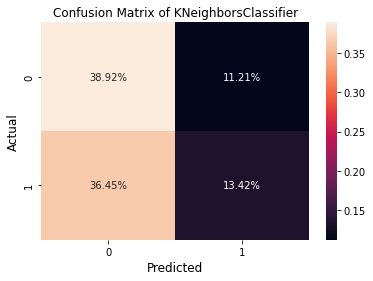

In [34]:
# Using confusion matrix for Random Forest Classifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
cf_matrix = confusion_matrix(y_test, pred)
#fmt='.2%'
# Visualize Confution Matrix
sns.heatmap(cf_matrix/np.sum(cf_matrix),fmt='.2%', annot=True)
plt.title('Confusion Matrix of KNeighborsClassifier', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()

In [35]:
evaluation_score = pd.DataFrame(columns=['Evaluation Score'])

evaluation_score.loc['Accuracy'] = accuracy_score(y_test, pred)
evaluation_score.loc['Precision'] = precision_score(y_test, pred)
evaluation_score.loc['Recall'] = recall_score(y_test, pred)
evaluation_score.loc['F1_Score'] = f1_score(y_test, pred)
evaluation_score

,Evaluation Score
Accuracy,0.523393
Precision,0.544885
Recall,0.269072
F1_Score,0.360248


In [36]:
# [Female	79.0	1	0	Yes	Self-employed	Rural	174.12	24.0	never smoked	(1)] => 0	100	1	0	1	3	0	3394	113
person = [[0,100,1,0,1,3,0,3394,113]]


#Print Prediction of KNeighborsClassifier model
pred = knn.predict(person)
print(pred)

if pred == 0:
  print('you are not detected as having a stroke, dont forget to take care of your health')
else:
  print('You have been detected as having the potential to have a stroke \n')

[1]
You have been detected as having the potential to have a stroke 



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


## **Kesimpulan**

Berdasarkan hasil penelitian diatas didapati bahwa pada saat training model penulis mendapatkan akurasi model yang sangat baik dari ke-4 model tersebut. Akan tetapi saat model dilakukan testing hasil akurasi nya kurang baik. 

Penulis menyimpulkan hal tersebut terjadi karena dataset yang digunakan dalam penilitian ini kurang begitu baik. Adanya Missing value pada kolom 'bmi' dan juga imbalanced pada data terutama pada kolom 'Stroke'. Penulis berusaha memperbaiki keseimbangan data menggunakan metode over sampling pada penelitian ini. Namun hal tersebut hanya memperbaiki training accuracy pada model saja, sehingga ketika dilakukan testing model dilakukan hasil nya tidak optimal karena model yang terlalu overfit.

## **References**

---

[[1]](https://www.jpnn.com/news/30-persen-penderita-stroke-usia-muda) ARISETIJONO, 2016. 30 Persen Penderita Stroke Usia Muda

https://www.jpnn.com/news/30-persenpenderita-stroke-usia-muda.


[[2]](https://jtiik.ub.ac.id/index.php/jtiik/article/view/190/0) SYAFIQ, MUHAMMAD, ACHMAD JAFAR A. K., RIZKA HUSNUN Z., DAESWARA 
JAUHARI, WANDA ATHIRA L., IMAM CHOLISSODIN, LAILIL MULFLIKHAH. 2016. Aplikasi Mobile (LIDE) untuk Diagnosis Tingkat Risiko Penyakit Stroke Menggunakan PTVPSO-SVM. Jurnal Teknologi Informasi dan Ilmu Komputer,Vol. 3, No.2, hlm. 147-155.

https://jtiik.ub.ac.id/index.php/jtiik/article/view/190/0


[[3]](https://pusdatin.kemkes.go.id/resources/download/general/Hasil%20Riskesdas%202013.pdf) BADAN PENELITIAN DAN PENGEMBANGAN KESEHATAN RI 2013. Laporan Riset Kesehatan Dasar (RISKESDAS) 2013. Jakarta : Kementerian Kesehatan Republik Indonesia,

https://pusdatin.kemkes.go.id/resources/download/general/Hasil%20Riskesdas%202013.pdf

[[4]](https://doi.org/10.1023/A:1010933404324) Breiman L (2001). “Random Forests”. Machine Learning. 45 (1): 5–32

https://doi.org/10.1023/A:1010933404324


[[5]](https://scikit-learn.org/stable/modules/naive_bayes.html). “Naive Bayes”. scikit-learn Machine Learning in Python 

https://scikit-learn.org/stable/modules/naive_bayes.html


[[6]](http://labdas.si.fti.unand.ac.id/2022/03/20/penjelasan-cara-kerja-algoritma-k-nearest-neighbor-knn/). Jamari. Untung, 2022. PENJELASAN CARA KERJA ALGORITMA K-NEAREST NEIGHBOR (KNN)
http://labdas.si.fti.unand.ac.id/2022/03/20/penjelasan-cara-kerja-algoritma-k-nearest-neighbor-knn/


[[7]](https://vincentmichael089.medium.com/machine-learning-2-logistic-regression-96b3d4e7b603). V. Michael, 2019. Machine Learning: Mengenal Logistic Regression

https://vincentmichael089.medium.com/machine-learning-2-logistic-regression-96b3d4e7b603

[[8]](https://medium.com/analytics-vidhya/one-hot-encoding-categorical-variables-what-is-it-why-is-it-how-is-it-6fd9ed3a161). Luna., “One-Hot Encoding Categorical Variables — What is it? Why is it? How is it?,” Medium, 2021, https://medium.com/analytics-vidhya/one-hot-encoding-categorical-variables-what-is-it-why-is-it-how-is-it-6fd9ed3a161.

[[9]](https://mti.binus.ac.id/2018/06/08/synthetic-minority-over-sampling-technique-smote-algorithm-for-handling-imbalanced-data/). ARWAN, VIRMAN ARDINA, LUDKI REZA ARIANA, FERICO SAMUEL, DUDI RAMDANI, ADITYA,  EVANS ANDITA SUKMANA, 2018. Synthetic Minority Over-sampling Technique (SMOTE) Algorithm For Handling Imbalanced Data 

https://mti.binus.ac.id/2018/06/08/synthetic-minority-over-sampling-technique-smote-algorithm-for-handling-imbalanced-data/
